# Задача регрессии. Дерево решений



In [6]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [21]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_cut=df[['Growth','Weight','Hair length','Shoe size']]
df_cut=df_cut.dropna()

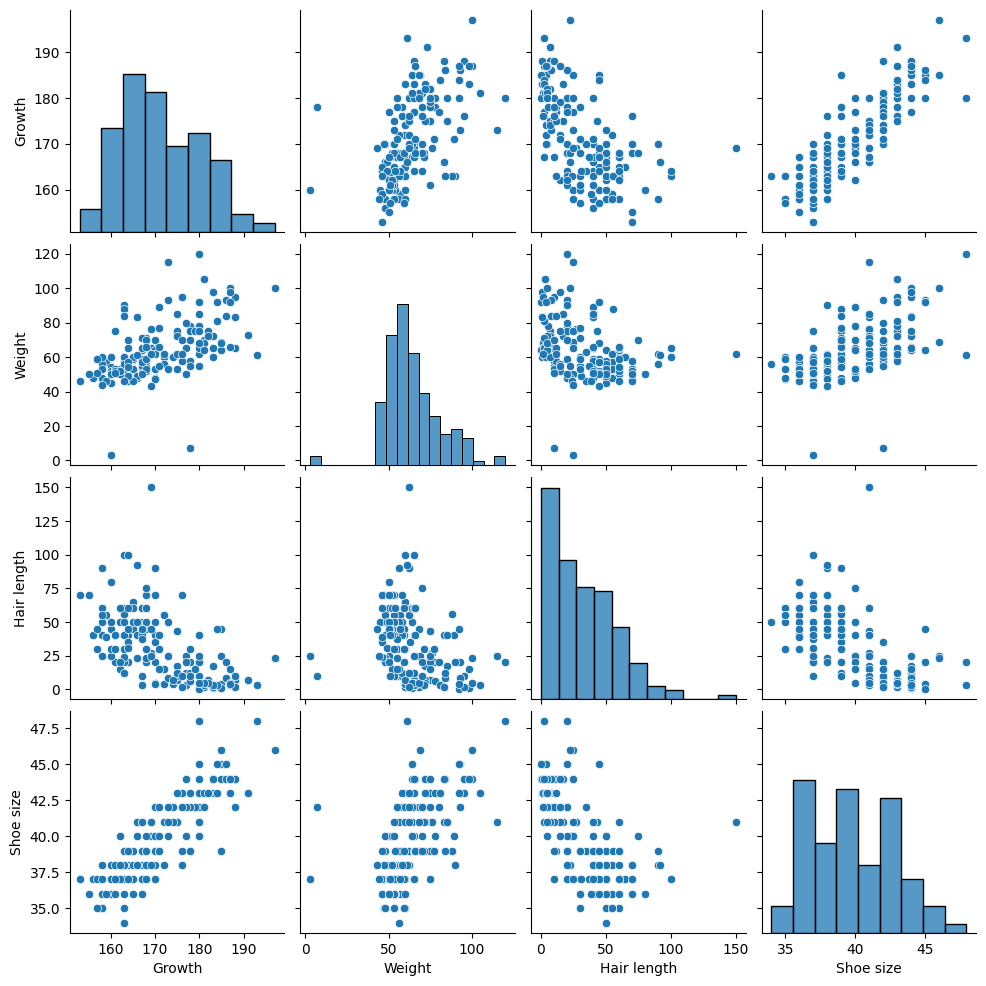

In [9]:
sns.pairplot(df_cut)

Гипотеза: угадать рост человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [10]:
model=tree.DecisionTreeRegressor(max_depth=12)
model.fit(df_cut[['Weight','Hair length','Shoe size']].values.reshape(-1,3), y=df_cut['Growth'].values)

DecisionTreeRegressor(max_depth=12)

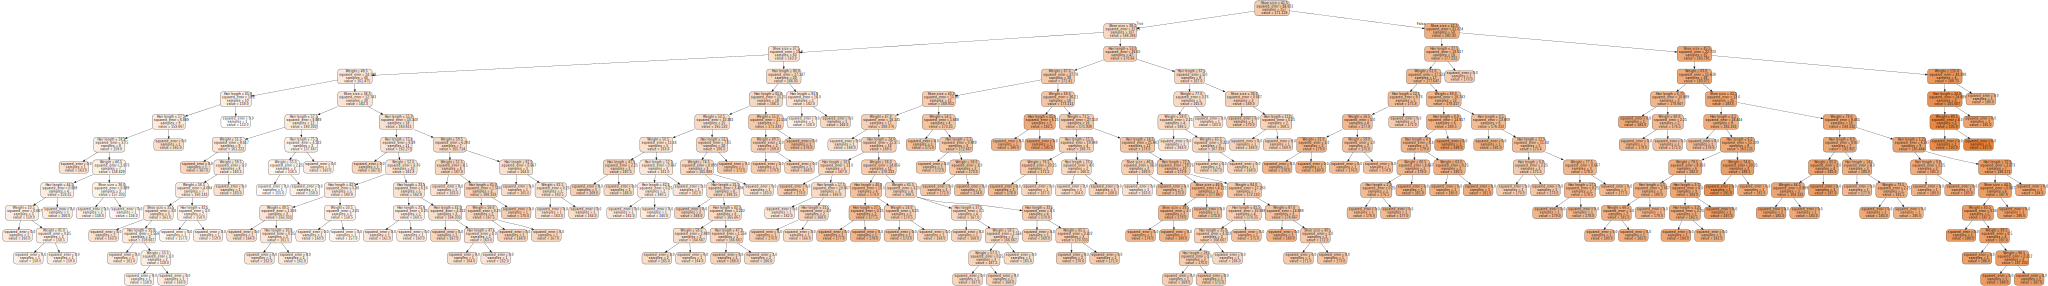

In [11]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                      feature_names=['Weight','Hair length','Shoe size'],
                      class_names='Growths',
                     filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Загружаем тестовую выбоку

In [12]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Hair length','Shoe size']]
df_test_cut=df_test_cut.dropna()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [13]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Weight','Hair length','Shoe size']].values.reshape(-1,3))

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test_cut['Growth'], df_test_cut['Predicted'])

5.5

In [15]:
df_cut=df[['Age','Year of birth','Month of birthday']]


In [16]:
model=tree.DecisionTreeRegressor(max_depth=3)
model.fit(df_cut[['Year of birth','Month of birthday']].values.reshape(-1,2), y=df_cut['Age'].values)

DecisionTreeRegressor(max_depth=3)

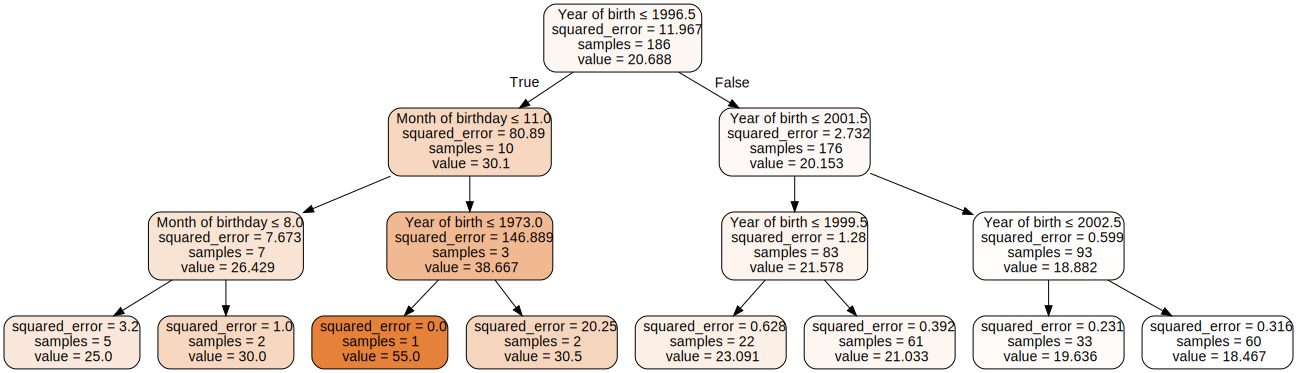

In [17]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                      feature_names=['Year of birth','Month of birthday'],
                      class_names='Ages',
                     filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [18]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Age','Year of birth','Month of birthday']]
df_test_cut=df_test_cut.dropna()

In [19]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Year of birth','Month of birthday']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test_cut['Age'], df_test_cut['Predicted'])

0.7241329318612689